<a href="https://colab.research.google.com/github/SoumiPi/menaces_cybersecuritaires/blob/main/menaces_cybersecuritaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Téléchargement du fichier
!wget https://www.sysnet.ucsd.edu/projects/url/url_svmlight.tar.gz

# Décompression du fichier
!tar -xzf url_svmlight.tar.gz

# Vérification des fichiers extraits
!ls url_svmlight/

--2024-11-26 12:32:43--  https://www.sysnet.ucsd.edu/projects/url/url_svmlight.tar.gz
Resolving www.sysnet.ucsd.edu (www.sysnet.ucsd.edu)... 137.110.222.10
Connecting to www.sysnet.ucsd.edu (www.sysnet.ucsd.edu)|137.110.222.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245011835 (234M) [application/x-gzip]
Saving to: ‘url_svmlight.tar.gz’

url_svmlight.tar.gz 100%[===================>] 233.66M  50.5MB/s    in 5.1s    

2024-11-26 12:32:48 (45.9 MB/s) - ‘url_svmlight.tar.gz’ saved [245011835/245011835]

Day0.svm    Day114.svm	Day1.svm   Day34.svm  Day49.svm  Day63.svm  Day78.svm  Day92.svm
Day100.svm  Day115.svm	Day20.svm  Day35.svm  Day4.svm	 Day64.svm  Day79.svm  Day93.svm
Day101.svm  Day116.svm	Day21.svm  Day36.svm  Day50.svm  Day65.svm  Day7.svm   Day94.svm
Day102.svm  Day117.svm	Day22.svm  Day37.svm  Day51.svm  Day66.svm  Day80.svm  Day95.svm
Day103.svm  Day118.svm	Day23.svm  Day38.svm  Day52.svm  Day67.svm  Day81.svm  Day96.svm
Day104.svm  Day119.svm

In [4]:
# Import des bibliothèques nécessaires
import numpy as np
from scipy.sparse import csr_matrix
import os

def load_svmlight_file(filepath):
    """
    Charge un fichier au format SVM-light et retourne les étiquettes et les features
    """
    labels = []
    row_ind = []
    col_ind = []
    values = []
    max_feat_ind = 0
    row = 0

    with open(filepath, 'r') as f:
        for line in f:
            # Ignore les lignes vides ou commentaires
            if line.strip() == '' or line.startswith('#'):
                continue

            elements = line.strip().split()
            # Premier élément est l'étiquette
            labels.append(float(elements[0]))

            # Traitement des features
            for e in elements[1:]:
                feat_ind, feat_val = e.split(':')
                feat_ind = int(feat_ind)
                feat_val = float(feat_val)

                row_ind.append(row)
                col_ind.append(feat_ind)
                values.append(feat_val)
                max_feat_ind = max(max_feat_ind, feat_ind)

            row += 1

    # Conversion en arrays numpy
    labels = np.array(labels)

    # Création de la matrice sparse
    features = csr_matrix((values, (row_ind, col_ind)),
                         shape=(row, max_feat_ind + 1))

    return labels, features, max_feat_ind + 1

# Maintenant on peut charger les données
labels, features, n_features = load_svmlight_file('url_svmlight/Day0.svm')

# Affichage de quelques informations de base
print(f"Nombre d'échantillons : {len(labels)}")
print(f"Nombre de features : {n_features}")
print(f"Nombre d'URLs malveillantes : {sum(labels == 1)}")
print(f"Nombre d'URLs bénignes : {sum(labels == -1)}")

# Pour voir la forme de la matrice des features
print(f"\nForme de la matrice des features : {features.shape}")

Nombre d'échantillons : 16000
Nombre de features : 3231950
Nombre d'URLs malveillantes : 5963
Nombre d'URLs bénignes : 10037

Forme de la matrice des features : (16000, 3231950)


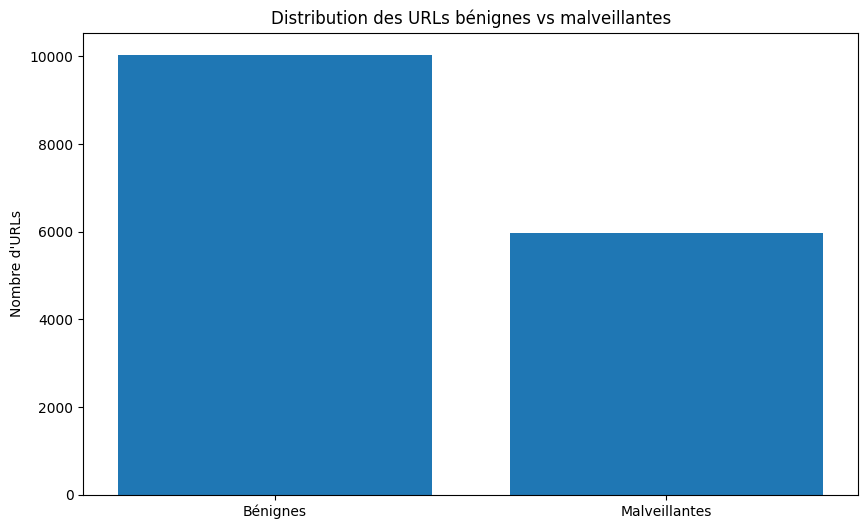


Densité de la matrice : 0.000036
Nombre moyen de features non-nulles par URL : 115.47


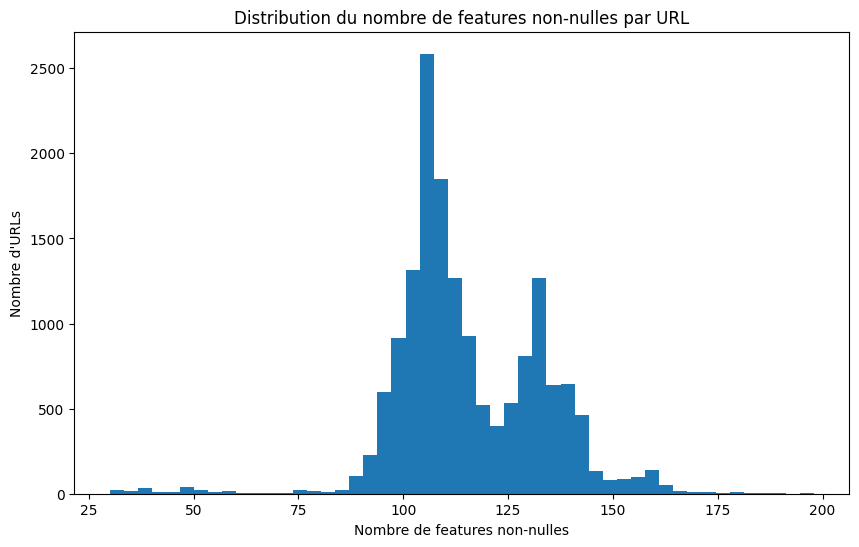

In [5]:
import matplotlib.pyplot as plt

# Visualisation de la distribution des classes
plt.figure(figsize=(10, 6))
plt.bar(['Bénignes', 'Malveillantes'], [sum(labels == -1), sum(labels == 1)])
plt.title('Distribution des URLs bénignes vs malveillantes')
plt.ylabel('Nombre d\'URLs')
plt.show()

# Analyse de la densité des features
density = features.nnz / (features.shape[0] * features.shape[1])
print(f"\nDensité de la matrice : {density:.6f}")
print(f"Nombre moyen de features non-nulles par URL : {features.nnz / features.shape[0]:.2f}")

# Distribution du nombre de features par URL
features_per_url = np.diff(features.indptr)
plt.figure(figsize=(10, 6))
plt.hist(features_per_url, bins=50)
plt.title('Distribution du nombre de features non-nulles par URL')
plt.xlabel('Nombre de features non-nulles')
plt.ylabel('Nombre d\'URLs')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Normalisation des features si nécessaire
scaler = StandardScaler(with_mean=False)  # with_mean=False car matrix sparse
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Régression logistique (rapide et interpretable)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Évaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.97      0.96      0.97      2048
         1.0       0.94      0.95      0.95      1152

    accuracy                           0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200



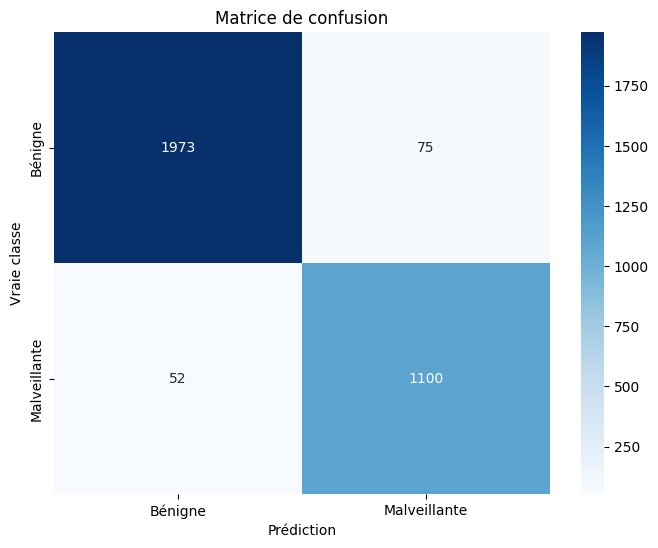


Top 20 features les plus importantes :
        feature  importance
28           28    0.760902
155         155    0.759041
6             6    0.480495
48           48    0.443578
155162   155162    0.380282
155214   155214    0.269650
5             5    0.252617
155165   155165    0.249848
47           47    0.218240
51           51    0.212896
355         355    0.160104
17           17    0.159197
362         362    0.157495
217         217    0.156721
216         216    0.156017
194         194    0.155085
215         215    0.152721
356         356    0.151625
267         267    0.150472
86006     86006    0.147992


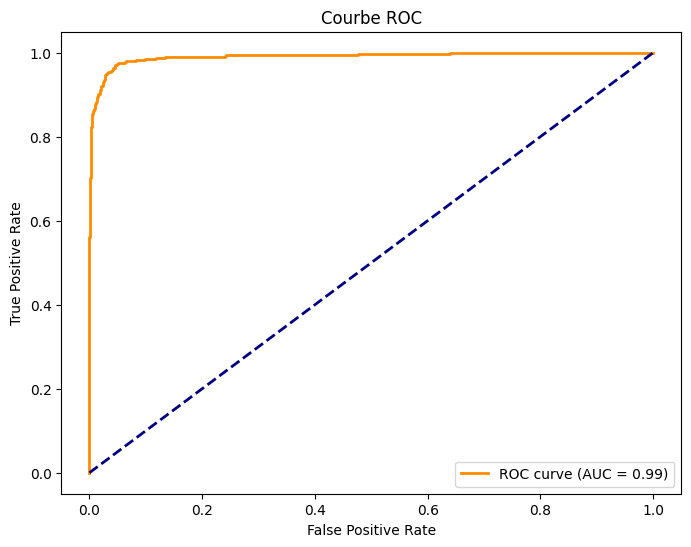

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bénigne', 'Malveillante'],
            yticklabels=['Bénigne', 'Malveillante'])
plt.title('Matrice de confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Prédiction')
plt.show()

# 2. Identifier les features les plus importantes
feature_importance = pd.DataFrame({
    'feature': range(X_train.shape[1]),
    'importance': abs(model.coef_[0])
})
top_features = feature_importance.nlargest(20, 'importance')
print("\nTop 20 features les plus importantes :")
print(top_features)

# 3. Courbe ROC
y_scores = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

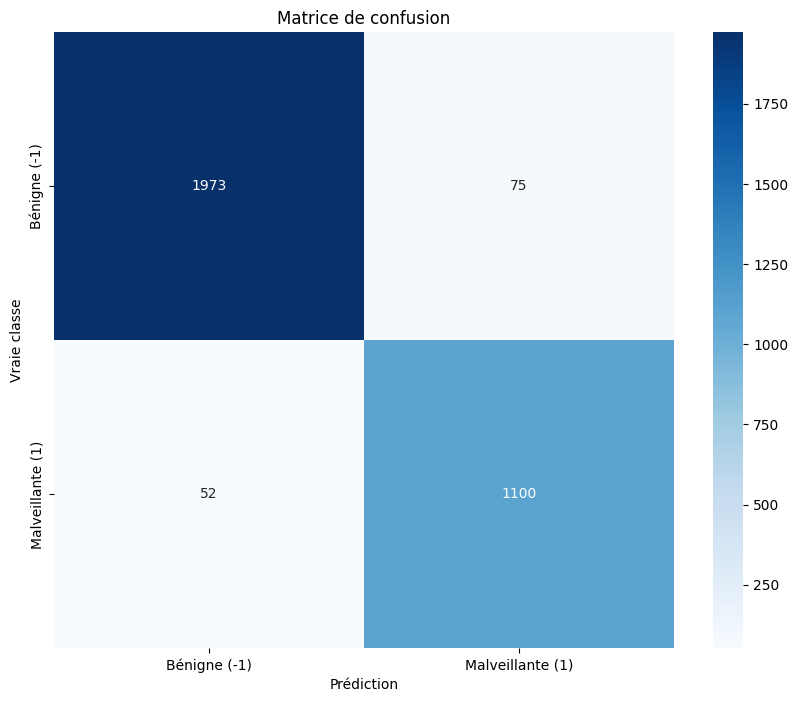


Analyse détaillée :
Vrais négatifs (URLs bénignes correctement identifiées) : 1973
Faux positifs (URLs bénignes classées comme malveillantes) : 75
Faux négatifs (URLs malveillantes classées comme bénignes) : 52
Vrais positifs (URLs malveillantes correctement identifiées) : 1100

Métriques par classe :

Pour les URLs bénignes :
Précision : 0.963
Rappel : 0.974

Pour les URLs malveillantes :
Précision : 0.936
Rappel : 0.955


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Création de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bénigne (-1)', 'Malveillante (1)'],
            yticklabels=['Bénigne (-1)', 'Malveillante (1)'])
plt.title('Matrice de confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Prédiction')
plt.show()

# Calcul de métriques détaillées à partir de la matrice
vp = cm[1,1]  # Vrais positifs (malveillants correctement identifiés)
fp = cm[0,1]  # Faux positifs (bénins classés comme malveillants)
fn = cm[1,0]  # Faux négatifs (malveillants classés comme bénins)
vn = cm[0,0]  # Vrais négatifs (bénins correctement identifiés)

print("\nAnalyse détaillée :")
print(f"Vrais négatifs (URLs bénignes correctement identifiées) : {vn}")
print(f"Faux positifs (URLs bénignes classées comme malveillantes) : {fp}")
print(f"Faux négatifs (URLs malveillantes classées comme bénignes) : {fn}")
print(f"Vrais positifs (URLs malveillantes correctement identifiées) : {vp}")

# Calcul de métriques supplémentaires
print("\nMétriques par classe :")
print("\nPour les URLs bénignes :")
print(f"Précision : {vn/(vn+fp):.3f}")
print(f"Rappel : {vn/(vn+fn):.3f}")

print("\nPour les URLs malveillantes :")
print(f"Précision : {vp/(vp+fp):.3f}")
print(f"Rappel : {vp/(vp+fn):.3f}")